<a href="https://colab.research.google.com/github/GaikwadSandesh/HotelBookingAnalysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma_better/EDA _Project/Hotel _Bookings.csv')

In [ ]:
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Before starting to correlete we will try to unerstand each coulmn
First we will start with the exploration of each column for some of the columns to see unique values


In [ ]:
dataframe.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Handling Null vaules - we can use most comman value for children and country
almost 92 percent data is missing gor company value and 15percent data is missingfor agents
we will drop the company column strait away as it is missing most value , 
for the agent column we will do small analysis athe the agent and for now we can drop that column also

In [ ]:
df = dataframe.drop(columns =['company' , 'agent'])

In [ ]:
df.fillna(df.mode().iloc[0] , inplace = True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

*italicised text*# Hotel column now we will inspect each colum add see what needs to be changed


In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

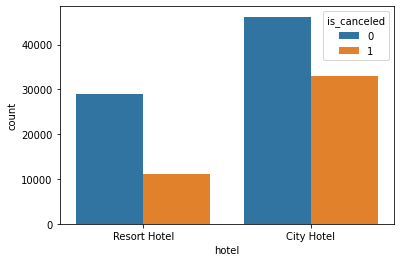

In [ ]:
ax = sns.countplot(x = 'hotel' , data=df , hue='is_canceled')

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

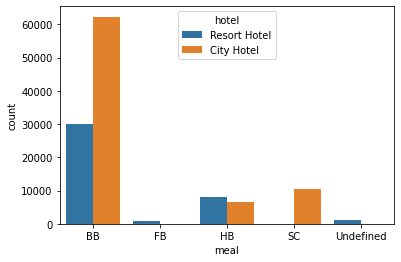

In [ ]:
ax1 = sns.countplot(x = 'meal' , data=df, hue='hotel')

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

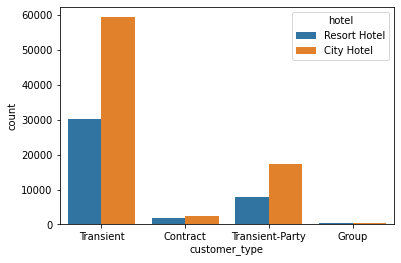

In [ ]:
ax2 = sns.countplot(x = 'customer_type' , data=df , hue = 'hotel')

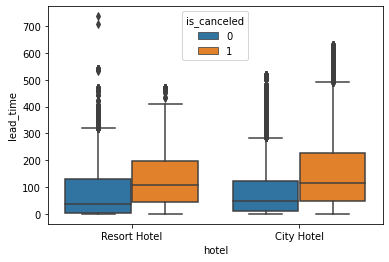

In [ ]:
ax = sns.boxplot(y = 'lead_time', x= 'hotel', data=df, hue='is_canceled' )

In [ ]:
df['lead_time'].median()

69.0

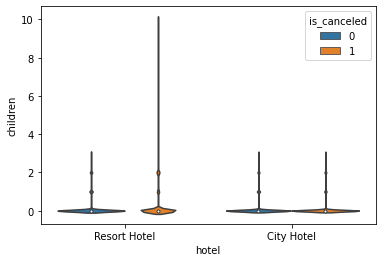

In [24]:
ax = sns.violinplot(y = 'children', x= 'hotel', data=df, hue='is_canceled' )

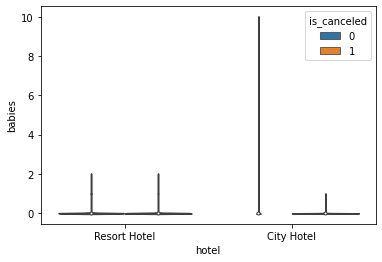

In [25]:
ax = sns.violinplot(y = 'babies', x= 'hotel', data=df, hue='is_canceled' )

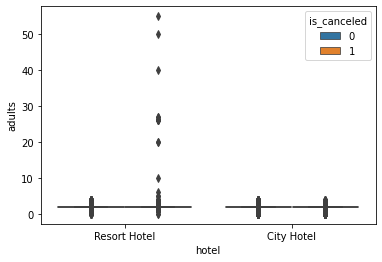

In [34]:
ax = sns.boxplot(y = 'adults', x= 'hotel', data=df, hue='is_canceled' )

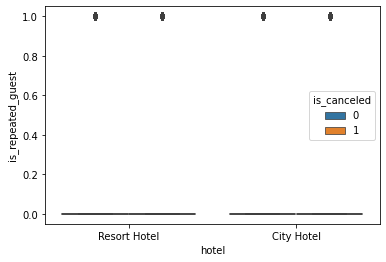

In [ ]:
ax = sns.boxplot(y = 'adults', x= 'hotel', data=df, hue='is_canceled' )

number of children , babies, adults has nothig to do with cancellation rate there is more cancellation for higher adults but its already captured in market segment category we can drop these coulums 

In [ ]:
columns_to_remove = ('children' , 'babies' , 'adults' , 'reservation_status_date' ,'arrival_date_week_number')

In [71]:
hoteldata = df.drop(columns_to_remove)

In [72]:
hoteldata.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [81]:
df['arrival_date_week_number'].value_counts()

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

In [67]:
repeat_guest_df = df.groupby(['is_canceled' , 'hotel'])['is_repeated_guest'].value_counts().to_frame()

In [69]:
repeat_guest_df

is_repeated_guest
is_canceled hotel        is_repeated_guest                   
0           City Hotel   0                              44637
                         1                               1591
            Resort Hotel 0                              27271
                         1                               1667
1           City Hotel   0                              32661
                         1                                441
            Resort Hotel 0                              11011
                         1                                111

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 181, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 169, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 5799, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4414, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert is_repeated_guest, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 193, in _repr_javascript_module_
    return self._gen_js(self._

In [63]:
#percentage cancellation by non repeat guest
non_repeated_cancel= (43672)/(71908+43672) 
repeated_cancel = (552)/(552+3258)
print('perecntage cancelation by repeated guest : ' , repeated_cancel)
print('perecntage cancelation by non repeated guest : ' , non_repeated_cancel)

perecntage cancelation by repeated guest :  0.14488188976377953
perecntage cancelation by non repeated guest :  0.3778508392455442


we can see that the cancellation is more for highere booking time

In [70]:
df.company.nunique(dropna = True)

AttributeError: ignored

# First we will plot uniqe values from each column so that we get better understand the data 